In [1]:
# import libraries:

import glob,os

import seaborn as sns

import pandas as pd
from datetime import datetime

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DTC

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import FormatStrFormatter

In [2]:
# read all the economic data available on fred library:

path = r'D:\GEARS\week4\data'
file = glob.glob(os.path.join(path, "*.csv"))
print(file)
itemList = []
for f in file:
    itemList.append(pd.read_csv(f))
print(itemList)

['D:\\GEARS\\week4\\data\\FRED-BASE.csv', 'D:\\GEARS\\week4\\data\\FRED-CIVPART.csv', 'D:\\GEARS\\week4\\data\\FRED-CP.csv', 'D:\\GEARS\\week4\\data\\FRED-CPIAUCSL.csv', 'D:\\GEARS\\week4\\data\\FRED-CPILFESL.csv', 'D:\\GEARS\\week4\\data\\FRED-DCOILWTICO.csv', 'D:\\GEARS\\week4\\data\\FRED-DFF.csv', 'D:\\GEARS\\week4\\data\\FRED-DGS10.csv', 'D:\\GEARS\\week4\\data\\FRED-DGS30.csv', 'D:\\GEARS\\week4\\data\\FRED-DGS5.csv', 'D:\\GEARS\\week4\\data\\FRED-DPRIME.csv', 'D:\\GEARS\\week4\\data\\FRED-DSPI.csv', 'D:\\GEARS\\week4\\data\\FRED-DSPIC96.csv', 'D:\\GEARS\\week4\\data\\FRED-DTB3.csv', 'D:\\GEARS\\week4\\data\\FRED-DTWEXB.csv', 'D:\\GEARS\\week4\\data\\FRED-DTWEXM.csv', 'D:\\GEARS\\week4\\data\\FRED-EMRATIO.csv', 'D:\\GEARS\\week4\\data\\FRED-EXCSRESNW.csv', 'D:\\GEARS\\week4\\data\\FRED-GDP.csv', 'D:\\GEARS\\week4\\data\\FRED-GDPC1.csv', 'D:\\GEARS\\week4\\data\\FRED-GDPDEF.csv', 'D:\\GEARS\\week4\\data\\FRED-GDPPOT.csv', 'D:\\GEARS\\week4\\data\\FRED-GFDEBTN.csv', 'D:\\GEARS\\week

In [3]:
# preprocess the data using linear approximation techniques:

# resample on each day -> daily data

def interpolateAsDaily(data):
    
    new_daily_data = data.set_index('Date').resample('D').asfreq()
    new_daily_data = new_daily_data.fillna(new_daily_data.interpolate())
    return new_daily_data

for i in range(52):
    x_ticks = (itemList[i])['Date']
    try:
        xs = [datetime.strptime(str(d), '%Y-%m-%d') for d in x_ticks]  
    except(ValueError):
        xs = [datetime.strptime(str(d), '%Y/%m/%d') for d in x_ticks]
    (itemList[i]).columns = ['Date', 'Value'+str(i)]
    (itemList[i])['Date'] = pd.to_datetime((itemList[i])['Date'])
    itemList[i] = interpolateAsDaily(itemList[i])

print(itemList)

[              Value0
Date                
1984-02-29 -0.001348
1984-03-01 -0.000514
1984-03-02  0.000320
1984-03-03  0.001154
1984-03-04  0.001989
...              ...
2019-12-14  0.014809
2019-12-15  0.015943
2019-12-16  0.017076
2019-12-17  0.018209
2019-12-18  0.019342

[13077 rows x 1 columns],               Value1
Date                
1948-02-01  0.005119
1948-02-02  0.004709
1948-02-03  0.004298
1948-02-04  0.003887
1948-02-05  0.003477
...              ...
2021-12-28  0.004221
2021-12-29  0.004378
2021-12-30  0.004534
2021-12-31  0.004690
2022-01-01  0.004847

[26999 rows x 1 columns],               Value2
Date                
1947-04-01 -0.053801
1947-04-02 -0.053328
1947-04-03 -0.052855
1947-04-04 -0.052382
1947-04-05 -0.051909
...              ...
2021-06-27  0.017085
2021-06-28  0.015714
2021-06-29  0.014343
2021-06-30  0.012972
2021-07-01  0.011602

[27121 rows x 1 columns],               Value3
Date                
1947-02-28  0.006518
1947-03-01  0.006874
1947-03-02  0.0

In [4]:
# merge
# merged_raw is used for reading the Date column

new_all = itemList[0]
for i in itemList[1:]:
    new_all = pd.merge(new_all, i, on = 'Date')
new_all.to_csv('./merged_raw.csv')
merged_raw = pd.read_csv('merged_raw.csv')

In [5]:
# conduct the PCA analysis:
# new_all: before pca, X_Train: after pca

pca = PCA(n_components = 3)
X_Train = pca.fit_transform(new_all)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.52757403 0.19878507 0.16262153]
0.8889806251637585


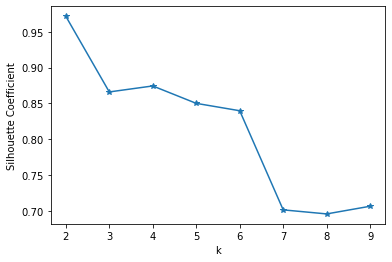

In [6]:
# conduct clustering
# silhouette score

scores = []
for k in range(2, 10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X_Train)
    scores.append(silhouette_score(X_Train, estimator.labels_, metric='euclidean'))
x = range(2, 10)
plt.xlabel('k')
plt.ylabel('Silhouette Coefficient')
plt.plot(x, scores, '*-')
plt.show()

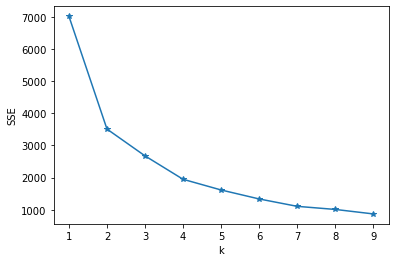

In [7]:
# SSE

sse = []
for k in range(1, 10):
    estimator = KMeans(n_clusters=k)
    estimator.fit(X_Train)
    sse.append(estimator.inertia_)
x = range(1, 10)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(x, sse, '*-')
plt.show()

In [8]:
# fit a K-means model

kmeans = KMeans(n_clusters = 3, max_iter = 1000)
classRes = pd.DataFrame(kmeans.fit_predict(X_Train))

datetime = merged_raw['Date']

X_Train = pd.DataFrame(X_Train.reshape(6194, 3))

res = kmeans.labels_
res_seri = pd.Series(res)

new_all = pd.concat([datetime, X_Train, classRes], axis = 1)

new_all.columns = ['DATE', 'PC1', 'PC2', 'PC3', 'Cluster']
print(new_all)
new_all.to_csv('./new_all.csv')

            DATE       PC1       PC2       PC3  Cluster
0     2003-01-03 -0.282211 -0.032265 -0.344235        0
1     2003-01-04 -0.235573 -0.011356 -0.322836        0
2     2003-01-05 -0.188869  0.009579 -0.301271        0
3     2003-01-06 -0.142177  0.030501 -0.279800        0
4     2003-01-07 -0.095486  0.051373 -0.258328        0
...          ...       ...       ...       ...      ...
6189  2019-12-14  0.000594 -0.037497 -0.065362        0
6190  2019-12-15 -0.011373 -0.044378 -0.065290        0
6191  2019-12-16 -0.023296 -0.051255 -0.065200        0
6192  2019-12-17 -0.035393 -0.058205 -0.065096        0
6193  2019-12-18 -0.046800 -0.065051 -0.065055        0

[6194 rows x 5 columns]


0       0
1       0
2       0
3       0
4       0
       ..
6189    0
6190    0
6191    0
6192    0
6193    0
Name: Cluster, Length: 6194, dtype: int32
0       2003-01-03
1       2003-01-04
2       2003-01-05
3       2003-01-06
4       2003-01-07
           ...    
6189    2019-12-14
6190    2019-12-15
6191    2019-12-16
6192    2019-12-17
6193    2019-12-18
Name: DATE, Length: 6194, dtype: object


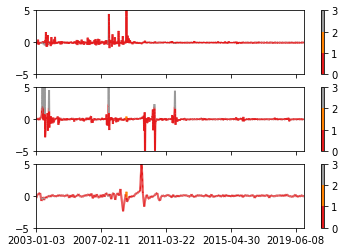

In [9]:
# visualize the cluster
import matplotlib.ticker as mticker

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

cmap = plt.get_cmap('Set1')
norm = BoundaryNorm([0, 1, 2, 3], cmap.N)
x = np.array(range(6194))
cluster = new_all['Cluster']
print(cluster)
data = new_all['DATE']
print(data)
for i in range(3):
    
    y = new_all['PC'+str(i+1)]

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(cluster)
    lc.set_linewidth(2)
    line = axs[i].add_collection(lc)
    fig.colorbar(line, ax=axs[i])


xlabels = axs[0].get_xticks().tolist()
axs[0].xaxis.set_major_locator(mticker.FixedLocator(xlabels))
axs[0].xaxis.set_ticks(range(0,6194,1500))
axs[0].xaxis.set_ticklabels(new_all['DATE'][0:6194:1500])
axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-5, 5)

plt.show()

In [10]:
# split the data

X = new_all.iloc[:,1:-1]
Y = cluster
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 420)
print(X)

           PC1       PC2       PC3
0    -0.282211 -0.032265 -0.344235
1    -0.235573 -0.011356 -0.322836
2    -0.188869  0.009579 -0.301271
3    -0.142177  0.030501 -0.279800
4    -0.095486  0.051373 -0.258328
...        ...       ...       ...
6189  0.000594 -0.037497 -0.065362
6190 -0.011373 -0.044378 -0.065290
6191 -0.023296 -0.051255 -0.065200
6192 -0.035393 -0.058205 -0.065096
6193 -0.046800 -0.065051 -0.065055

[6194 rows x 3 columns]


In [11]:
# conduct Decision trees and Naive bayes methods:

# GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, Y_train)
print("The naive_bayes classification result is：", GNB.predict(X_test))
print("training score set is: {:.3f}".format(GNB.score(X_train, Y_train)))
print("test score set is: {:.3f}".format(GNB.score(X_test, Y_test)))

# Decision tree

decisionTree = DTC()
decisionTree.fit(X_train, Y_train)
print("The DecisionTree classification result is：", decisionTree.predict(X_test))
print("training score set is: {:.3f}".format(decisionTree.score(X_train, Y_train)))
print("test score set is: {:.3f}".format(decisionTree.score(X_test, Y_test)))

The naive_bayes classification result is： [0 0 0 ... 0 0 0]
training score set is: 0.987
test score set is: 0.992
The DecisionTree classification result is： [0 0 0 ... 0 0 0]
training score set is: 1.000
test score set is: 0.999


In [13]:
# LDA

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,Y_train)
print("The LDA classification result is：", LDA.predict(X_test))
print("training score set is: {:.3f}".format(LDA.score(X_train, Y_train)))
print("test score set is: {:.3f}".format(LDA.score(X_test, Y_test)))

The LDA classification result is： [0 0 0 ... 0 0 0]
training score set is: 1.000
test score set is: 0.999


In [12]:
#visualize the classification observed on the s&p data for better understanding on the performance of the model:



